# Notebook to play around with new data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
adni_search_csv = '/home/nikhil/projects/brain_changes/data/adni/ADNI123_search.csv'
adni_cohort_csv = '/home/nikhil/projects/brain_changes/data/adni/ADNI123_long_aug_2021.csv'
adni_seatch_df = pd.read_csv(adni_search_csv)
adni_cohort_df = pd.read_csv(adni_cohort_csv)

n_subjects = len(adni_cohort_df['Subject'].unique())
n_images = len(adni_cohort_df['Image Data ID'].unique())
print(f'Number unique subjects: {n_subjects}, images: {n_images}')
adni_seatch_df = adni_seatch_df.rename(columns={'Subject ID':'Subject'})
adni_cohort_df.head()

Number unique subjects: 1057, images: 3573


,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,I673862,941_S_5193,SMC,F,74,30,MRI,MPRAGE,Original,4/02/2015,DCM,NaN
1,I673841,941_S_5124,SMC,F,79,30,MRI,MPRAGE,Original,4/08/2015,DCM,NaN
2,I420755,941_S_5124,SMC,F,78,28,MRI,MPRAGE,Original,4/21/2014,DCM,NaN
3,I431036,941_S_4764,EMCI,F,85,30,MRI,MPRAGE,Original,6/16/2014,DCM,NaN
4,I376064,941_S_4764,EMCI,F,84,28,MRI,MPRAGE,Original,6/10/2013,DCM,NaN


In [3]:
adni_cohort_df = pd.merge(adni_cohort_df,adni_seatch_df[['Subject','Phase']], on='Subject', how='left')
adni_cohort_df = adni_cohort_df.drop_duplicates(subset=['Image Data ID'])

n_subjects = len(adni_cohort_df['Subject'].unique())
n_images = len(adni_cohort_df['Image Data ID'].unique())
print(f'Number unique subjects: {n_subjects}, images: {n_images}')

adni_cohort_df.head()

Number unique subjects: 1057, images: 3573


,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded,Phase
0,I673862,941_S_5193,SMC,F,74,30,MRI,MPRAGE,Original,4/02/2015,DCM,NaN,ADNI 2
1,I673841,941_S_5124,SMC,F,79,30,MRI,MPRAGE,Original,4/08/2015,DCM,NaN,ADNI 2
3,I420755,941_S_5124,SMC,F,78,28,MRI,MPRAGE,Original,4/21/2014,DCM,NaN,ADNI 2
5,I431036,941_S_4764,EMCI,F,85,30,MRI,MPRAGE,Original,6/16/2014,DCM,NaN,ADNI 2
7,I376064,941_S_4764,EMCI,F,84,28,MRI,MPRAGE,Original,6/10/2013,DCM,NaN,ADNI 2


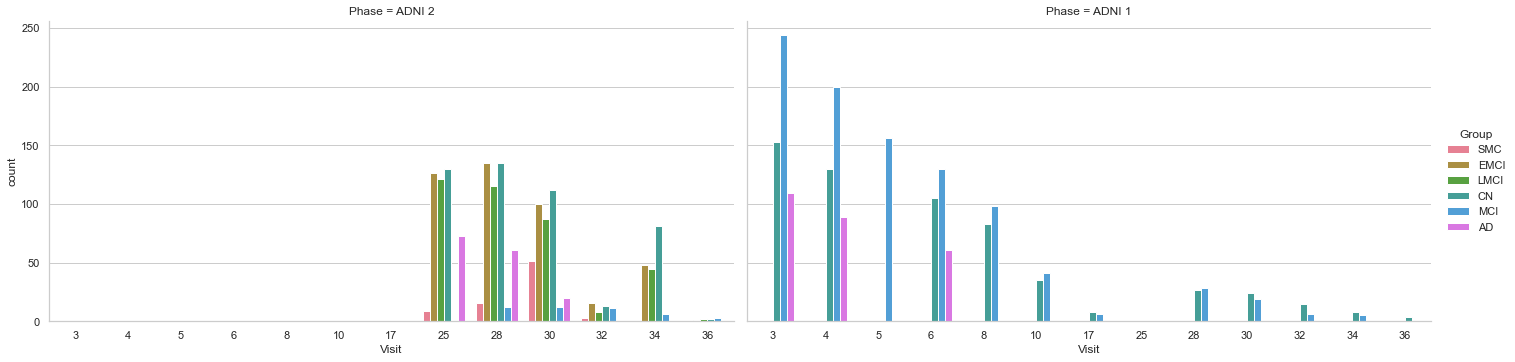

In [4]:
plot_df = adni_cohort_df[adni_cohort_df['Phase'].isin(['ADNI 1', 'ADNI 2'])].copy()
palette = 'husl'
sns.set(font_scale=1)
with sns.axes_style("whitegrid"):
    g = sns.catplot(x='Visit', hue='Group', col='Phase', kind='count', col_wrap=2, aspect=2, height=5, palette = palette,
                    data=plot_df)